In [7]:
using Turing
using StatsPlots
using DataFrames
using Logging
using CSV

# setting default attributes for plots
default(labels=false)

# Code 0.1

In [2]:
println("All models are wrong, but some are useful!")

All models are wrong, but some are useful!


# Code 0.2

In [4]:
@show x = range(1, 2, length=2)
@time @show x = x .* 10 .|> log |> sum |> exp
x 

x = range(1, 2, length = 2) = 1.0:1.0:2.0
x = ((x .* 10 .|> log) |> sum) |> exp = 200.0000000000001
  0.000237 seconds (174 allocations: 12.641 KiB)


200.0000000000001

# Code 0.3

In [5]:
@time [
    log(0.01^200); 
    200 * log(0.01)
]

  0.000009 seconds (1 allocation: 80 bytes)


2-element Vector{Float64}:
  -Inf
 -921.0340371976182

# Code 0.4

  1.985118 seconds (1.70 M allocations: 175.295 MiB, 4.61% gc time, 94.18% compilation time: 84% of which was recompilation)


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.2 seconds
Compute duration  = 1.2 seconds
parameters        = a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std      mcse   ess_bulk   ess_tail      rhat    ⋯
      Symbol    Float64   Float64   Float64    Float64    Float64   Float64    ⋯

           a   -17.5942    0.4609    0.0459    98.5417    90.0690    1.0044    ⋯
           b     3.9329    0.0287    0.0029    97.4303    83.1872    1.0050    ⋯
                                                                1 column omitted

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 

   

resid = df.dist - (mean_a .+ mean_b * df.speed) = [3.862522170006466, 11.862522170006466, -5.936242672990669, 12.06375732700933, 2.1308357126769515, -7.802085901655424, -3.735007515987803, 4.264992484012197, 12.264992484012197, -8.667929130320182, 2.332070869679818, -15.600850744652561, -9.600850744652561, -5.600850744652561, -1.6008507446525613, -7.53377235898494, 0.46622764101505965, 0.46622764101505965, 12.46622764101506, -11.46669397331732, -1.4666939733173194, 22.53330602668268, 42.53330602668268, -21.3996155876497, -15.399615587649699, 12.600384412350301, -13.332537201982078, -5.332537201982078, -17.265458816314457, -9.265458816314457, 0.7345411836855433, -11.198380430646829, 2.8016195693531714, 22.80161956935317, 30.80161956935317, -21.131302044979215, -11.131302044979215, 10.868697955020785, -29.064223659311587, -13.064223659311587, -9.064223659311587, -5.064223659311587, 2.935776340688413, -2.930066887976352, -18.862988502308724, -6.795910116641096, 15.204089883358904, 16.2040

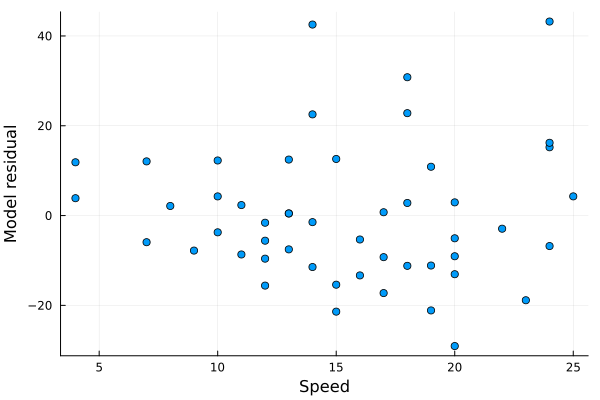

In [9]:
# load data
df = DataFrame(CSV.File("data/cars.csv"));

# fit a linear regression on distance on speed
@model function speed_dist(speed, dist)
    a ~ Uniform(-20, 20)
    b ~ Uniform(1, 5)
    m = a .+ b * speed
    dist ~ MvNormal(m, 1)
end

Logging.disable_logging(Logging.Warn)
@time chain = sample(speed_dist(df.speed, df.dist), NUTS(0.65), 1000)
display(chain)

# extract mean params
mean_a, mean_b = mean(chain)[:,:mean]

# get residuals of the data
@time @show resid = df.dist - (mean_a .+ mean_b * df.speed);
scatter(df.speed, resid; xlabel = "Speed", ylabel = "Model residual")

# Code 0.5

In [6]:
import Pkg
# this list of dependencies might be incomplete, as I'm not maintaining it.
# please check Project.toml for the full list
Pkg.add(["Turing", "CSV", "DataFrames", "Plots", "StatsPlots", "StatisticalRethinking"])

   Resolving package versions...
   Installed Static ─────────────────────────── v0.8.7
   Installed NLSolversBase ──────────────────── v7.8.3
   Installed ANSIColoredPrinters ────────────── v0.0.1
   Installed SLEEFPirates ───────────────────── v0.6.39
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed LayoutPointers ─────────────────── v0.1.14
   Installed StaticArrayInterface ───────────── v1.4.0
   Installed GenericSchur ───────────────────── v0.5.3
   Installed PositiveFactorizations ─────────── v0.2.4
   Installed LineSearches ───────────────────── v7.2.0
   Installed StructuralCausalModels ─────────── v1.4.1
   Installed IOCapture ──────────────────────── v0.2.3
   Installed CPUSummary ─────────────────────── v0.2.3
   Installed HostCPUFeatures ────────────────── v0.1.15
   Installed VectorizationBase ──────────────── v0.21.64
   Installed NamedTupleTools ────────────────── v0.14.3
   Installed ParetoSmoothedImportanceSampling ─ v1.5.2
   Installed Documenter ──